In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

In [44]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3 Algorithms used:

RandomForestClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [48]:
from matplotlib import rcParams

# Feature selection

<Figure size 3000x3000 with 0 Axes>

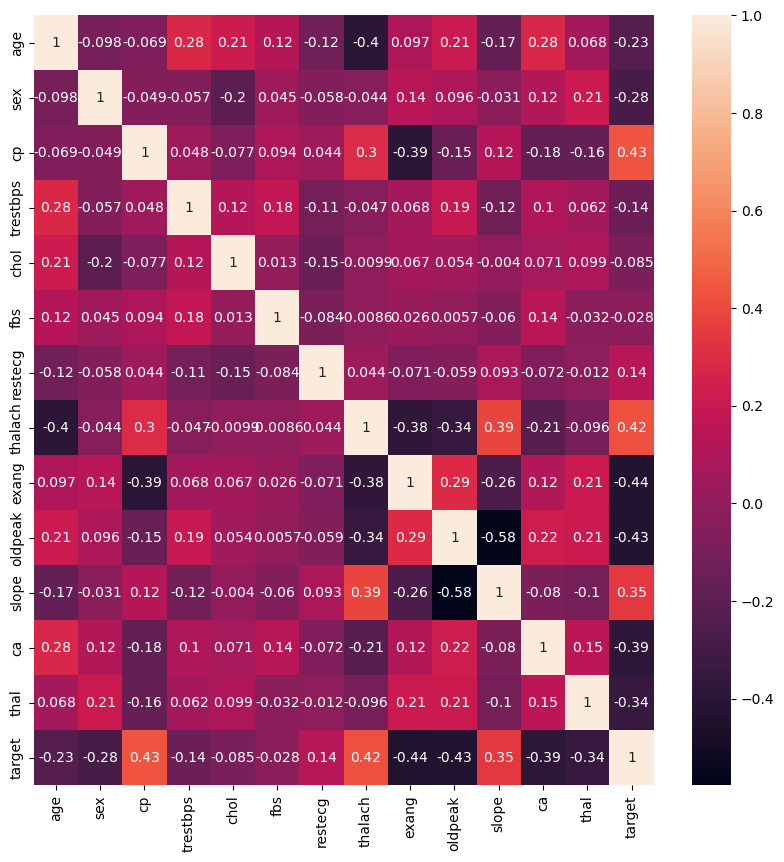

<Figure size 3000x3000 with 0 Axes>

In [49]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(30,30))

In [50]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [51]:
col=['trestbps', 'chol','thalach']

<AxesSubplot:ylabel='trestbps'>

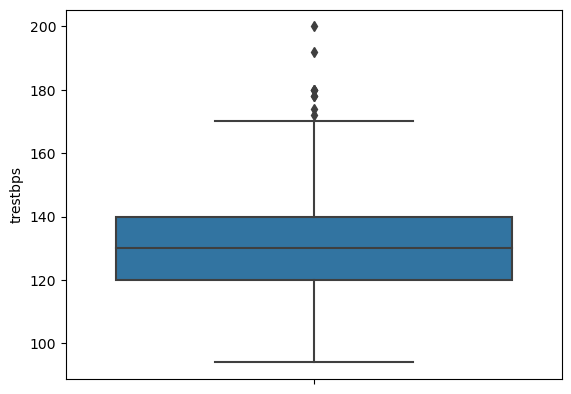

In [52]:
sns.boxplot(y='t',data=df)

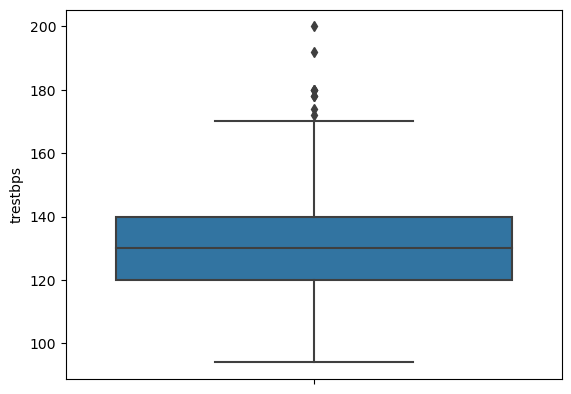

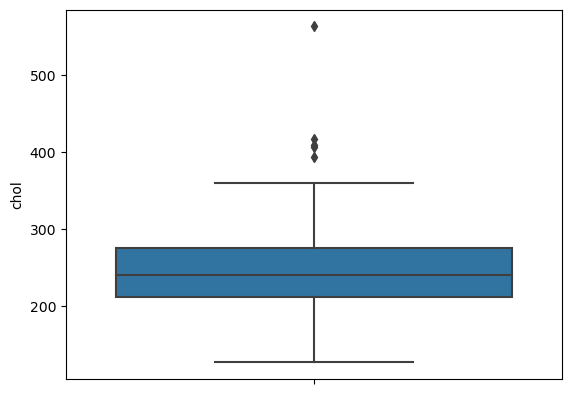

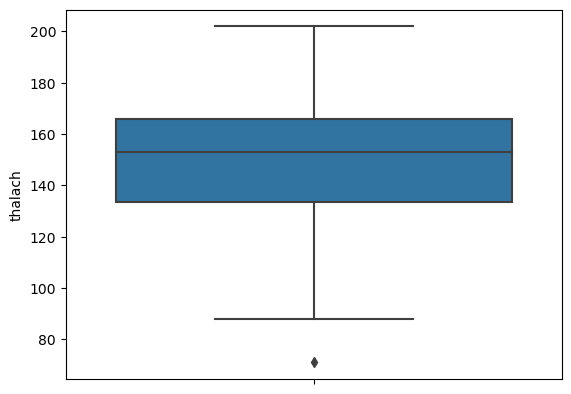

In [53]:
for c in col:
  plt.figure()
  sns.boxplot(y=c,data=df)

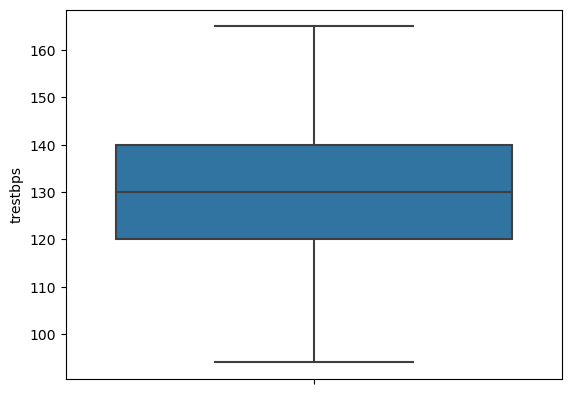

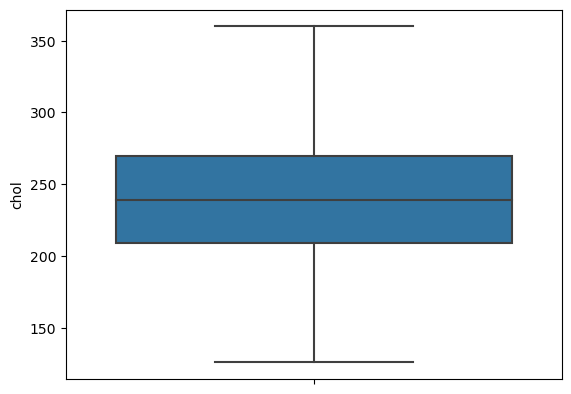

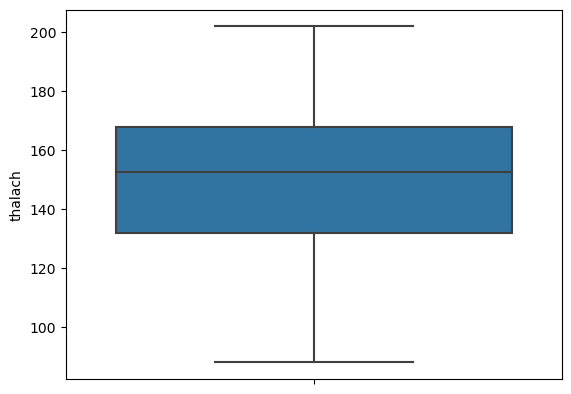

In [54]:
for c in col:
  percentile25=df[c].quantile(0.25)
  percentile75=df[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df=df[df[c]<upper_limit]
  df=df[df[c]>lower_limit]
  plt.figure()
  sns.boxplot(y=c,data=df)

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('target',1),
                                              df['target'],test_size=0.30, random_state=42)

In [56]:
model=RandomForestClassifier(max_depth=5)
model.fit(X_train,Y_train)


RandomForestClassifier(max_depth=5)

In [57]:
Y_predict=model.predict(X_test)

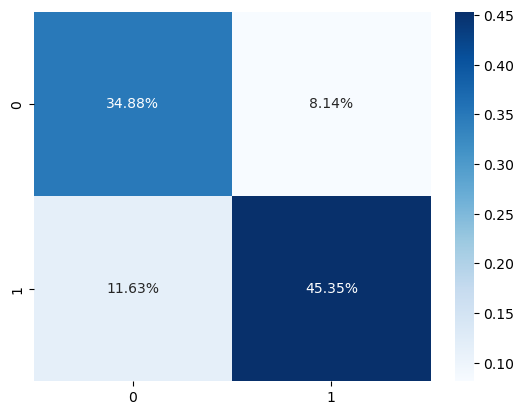

Accuracy is:  80.23255813953489


In [59]:
cm=confusion_matrix(Y_test,Y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap='Blues')
plt.show()
ac=accuracy_score(Y_test,Y_predict)
print('Accuracy is: ',ac*100)

In [61]:
confusion_matrix(Y_test,Y_predict)

array([[30,  7],
       [10, 39]], dtype=int64)

In [64]:
tn,fp,fn,tp= confusion_matrix(Y_test,Y_predict).ravel()

In [65]:
tn

30

<AxesSubplot:>

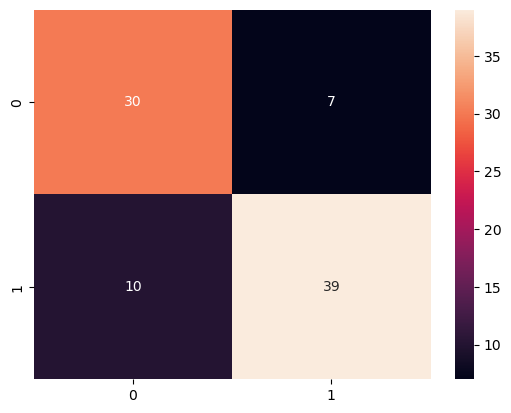

In [62]:
sns.heatmap(confusion_matrix(Y_test,Y_predict),annot=True)

# Find out the accuracy

In [66]:
from sklearn.metrics import accuracy_score


In [67]:
accuracy_score(Y_test,Y_predict)

0.8023255813953488

# Find out the auc roc score

In [68]:
from sklearn.metrics import roc_auc_score

In [69]:
roc_auc_score(Y_test,Y_predict)

0.8033645890788746

# Find out recall and precision

In [70]:
P=tp/(tp+fp)


In [72]:
P

0.8478260869565217

In [73]:
R=tp/(tp+fn)

In [74]:
R


0.7959183673469388

In [75]:
f1_score=(2*P*R)/(P+R)

In [76]:
f1_score


0.8210526315789473